<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221013_Contact_Tracing_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/08/20/contact-tracing-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_json('https://raw.githubusercontent.com/amankharwal/Website-data/master/livedata.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         100 non-null    object        
 1   timestamp  100 non-null    datetime64[ns]
 2   latitude   100 non-null    float64       
 3   longitude  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.2+ KB


In [4]:
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


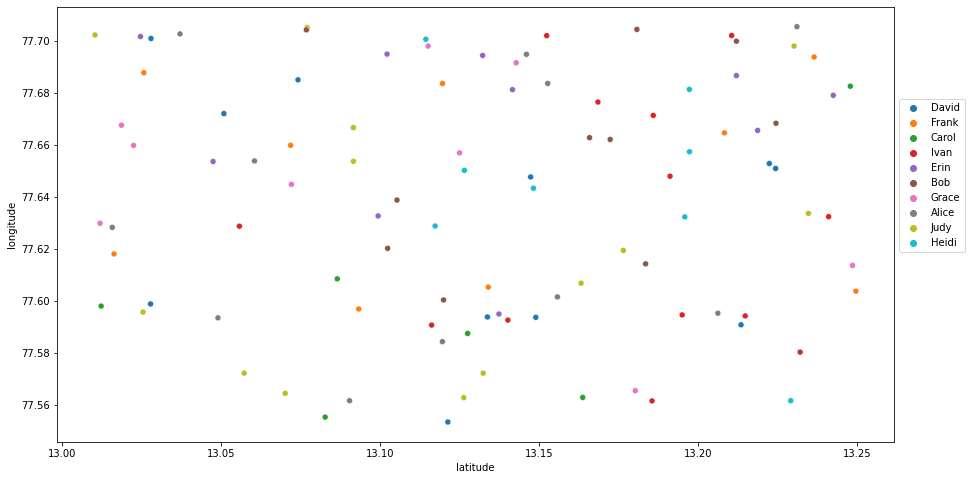

In [7]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [48]:
def get_infected_names(input_name):

    epsilon = 0.0098288 # radial distance of 6 feet in km
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    labels = model.labels_

    input_name_clusters = []
    for i in range(len(df)):
      if df['id'][i] == input_name:
        if df['cluster'][i] in input_name_clusters:
          pass
        else:
          input_name_clusters.append(df['cluster'][i])


    infected_names = []
    for cluster in input_name_clusters:
      if cluster != -1:
        ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
        for i in range(len(ids_in_cluster)):
          member_id = ids_in_cluster.iloc[i]
          if (member_id not in infected_names) and (member_id != input_name):
            infected_names.append(member_id)
          else:
            pass
    
    return infected_names, labels


In [50]:
get_infected_names('Erin')[0]

['Grace', 'Alice', 'Ivan', 'Bob', 'David', 'Carol', 'Judy', 'Frank']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


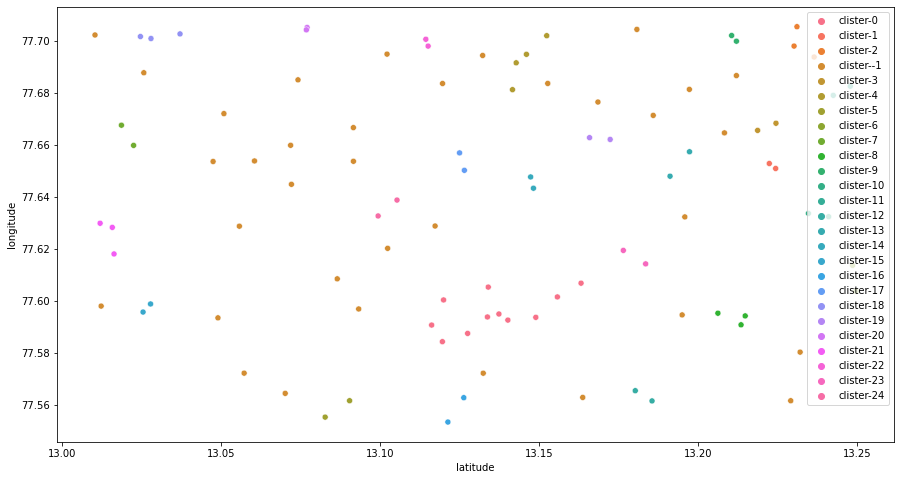

In [51]:
labels = get_infected_names('Erin')[1]
fig = plt.figure(figsize=(15,8))
sns.scatterplot(df['latitude'], df['longitude'], hue=['clister-{}'.format(x) for x in labels])
plt.show()